# Aggregating files with CWT API

This tutorial show how to aggregate some files via the compute api

You need to get your API key from [here](https://aims2.llnl.gov/user/profile) and possibly authenticated via my_proxy_client or OAuth2 if the files you're trying to use require it.

In [ ]:
host = 'aims2.llnl.gov'
verify = True
compute_token = None

import cwt

client = cwt.WPSClient('https://{!s}/wps/'.format(host), compute_token=compute_token, verify=verify)
client

In [2]:
files = [
    # (612, 90, 144)
    'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_185001-190012.nc',
    # (600, 90, 144)
    'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_190101-195012.nc',
    # (600, 90, 144)
    'http://aims3.llnl.gov/thredds/dodsC/css03_data/CMIP6/CMIP/NASA-GISS/GISS-E2-1-G/historical/r10i1p1f1/Amon/tas/gn/v20180830/tas_Amon_GISS-E2-1-G_historical_r10i1p1f1_gn_195101-200012.nc'
]

inputs = [cwt.Variable(x, 'tas') for x in files]

In [3]:
proc = client.process_by_name('CDAT.aggregate')
proc

Process(identifier='CDAT.aggregate', title='CDAT.aggregate', status_supported=None, store_supported=None, process_version='devel', abstract='Aggregate a variable over multiple files. Supports subsetting and regridding.', metadata=[{'url': None, 'title': 'inputs:50', 'role': None}])

In [4]:
client.execute(proc, inputs)

proc.wait()

ProcessAccepted None
ProcessStarted Building aggregation with 3 inputs 0
ProcessStarted Processing 0
ProcessSucceeded None


True

In [5]:
import cdms2

f = cdms2.open(proc.output.uri)

tas = f[proc.output.var_name]

# (362, 240, 480)
print(tas.shape)

/1Tb/miniconda3/envs/nightly/lib/python3.6/importlib/_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


(1812, 90, 144)


/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/__init__.py:324: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/doutriaux1/.cache/Python-Eggs/vcs-v8.1_2_g20f721c-py3.6.egg-tmp/share/vcs/initial.attributes' mode='r' encoding='UTF-8'>
/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/utils.py:1432: DeprecationWarning: Single-argument form of np.ma.maximum is deprecated. Use np.ma.maximum.reduce instead.
/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/utils.py:1454: DeprecationWarning: Single-argument form of np.ma.maximum is deprecated. Use np.ma.maximum.reduce instead.
/1Tb/miniconda3/envs/nightly/lib/python3.6/site-packages/vcs-v8.1_2_g20f721c-py3.6.egg/vcs/VTKPlots.py:1032: ResourceWarning: unclosed file <_io.TextIOWrapper name='/home/doutriaux1/.cache/Python-Eggs/vcs-v8.1_2_g20f721c-py3.6.egg-tmp/share/vcs/data_continent_fine' mode='r' encoding

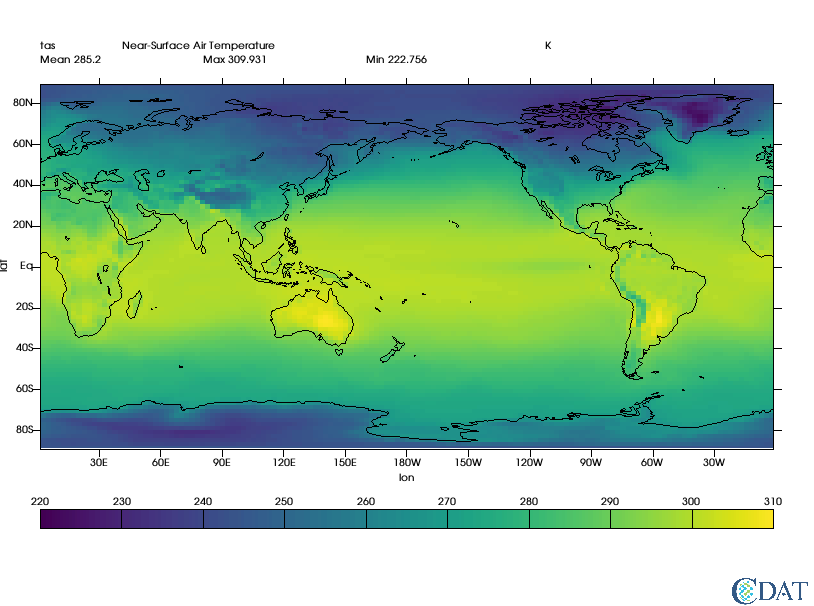

In [6]:
import vcs

v = vcs.init()

v.plot(tas[0])